In [1]:
from metrics import trueskill
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
%matplotlib inline
trueskill.ts.setup(draw_probability=0)
def printmd(string):
    display(Markdown(string))

def print_rankings(rankings):
    print("Current Rankings\n")
    for i in range(len(rankings)):
        player, rating, rank = rankings[i]
        print("[{:2d}] {} \t TrueSkill={:.2f} \t rating {}".format(i + 1, player, rank, rating))

def print_matches(matches):
    for match in matches:
        (p1, p2), (p3, p4) = match
        print("[{} & {}] vs [{} and {}]".format(p1, p2, p3, p4))


In [6]:
players = ['ferenc', 'aly', 'geoff', 'jose', 'joost', 'lucas', 'francisco', 'zehan', 
           'christian', 'wenzhe', 'yordan', 'seb', 'carlos', 'alejandro', 'johannes']
dataset_file='twitter_fusball_league.csv'

ratings = trueskill.create_default_ratings(players)
ratings, rating_history = trueskill.update_ratings(ratings, dataset_file)
rankings = trueskill.rank_players(ratings)

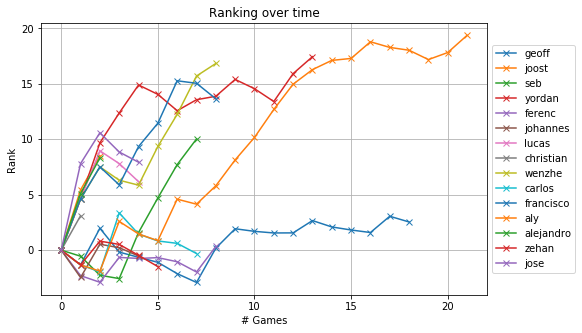

In [7]:
trueskill.plot_historical_rankings(rating_history)

In [8]:
print_rankings(rankings)

Current Rankings

[ 1] aly 	 TrueSkill=19.37 	 rating trueskill.Rating(mu=30.793, sigma=3.809)
[ 2] yordan 	 TrueSkill=17.44 	 rating trueskill.Rating(mu=30.936, sigma=4.498)
[ 3] wenzhe 	 TrueSkill=16.83 	 rating trueskill.Rating(mu=32.938, sigma=5.369)
[ 4] francisco 	 TrueSkill=13.65 	 rating trueskill.Rating(mu=29.323, sigma=5.225)
[ 5] seb 	 TrueSkill=10.02 	 rating trueskill.Rating(mu=26.022, sigma=5.332)
[ 6] joost 	 TrueSkill=8.52 	 rating trueskill.Rating(mu=29.694, sigma=7.059)
[ 7] alejandro 	 TrueSkill=8.32 	 rating trueskill.Rating(mu=30.123, sigma=7.269)
[ 8] jose 	 TrueSkill=7.93 	 rating trueskill.Rating(mu=25.581, sigma=5.884)
[ 9] lucas 	 TrueSkill=6.18 	 rating trueskill.Rating(mu=24.781, sigma=6.202)
[10] christian 	 TrueSkill=3.11 	 rating trueskill.Rating(mu=26.653, sigma=7.849)
[11] geoff 	 TrueSkill=2.54 	 rating trueskill.Rating(mu=14.898, sigma=4.119)
[12] ferenc 	 TrueSkill=0.33 	 rating trueskill.Rating(mu=16.313, sigma=5.326)
[13] carlos 	 TrueSkill=-0.31 	

In [9]:
available_players = players.copy()
# available_players.remove('aly')
for _ in range(3):
    print_matches(trueskill.matchmake(available_players, ratings))

[jose & zehan] vs [alejandro and aly]
[francisco & carlos] vs [wenzhe and johannes]
[joost & christian] vs [yordan and ferenc]
[francisco & jose] vs [zehan and alejandro]
[joost & aly] vs [carlos and wenzhe]
[yordan & christian] vs [ferenc and geoff]
[geoff & jose] vs [zehan and alejandro]
[joost & aly] vs [carlos and wenzhe]
[francisco & johannes] vs [yordan and ferenc]
